Mini Project 01 - Group T

In [ ]:
#libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

#ml libraries
from sklearn.cluster import KMeans  #k-menas clustering
from sklearn.model_selection import train_test_split #training testing split
from sklearn.preprocessing import StandardScaler  #scaling data
from sklearn.svm import SVC #support vector classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree  #DT classifier & plotting
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay #confusion matrix


In [2]:
data = pd.read_csv('data.csv')
print(data.head())

  p_id  accuracy  avg_reac_time
0  p01      97.9            188
1  p02      89.8            365
2  p03      98.9            205
3  p04      98.1            174
4  p05      97.8            134


In [3]:
#feature scaling and standardizing
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['accuracy', 'avg_reac_time']])

In [4]:
#K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
data['cluster_label']=kmeans.fit_predict(scaled_features)

print('data with cluster labels:')
print(data.head())

data with cluster labels:
  p_id  accuracy  avg_reac_time  cluster_label
0  p01      97.9            188              0
1  p02      89.8            365              1
2  p03      98.9            205              0
3  p04      98.1            174              0
4  p05      97.8            134              0


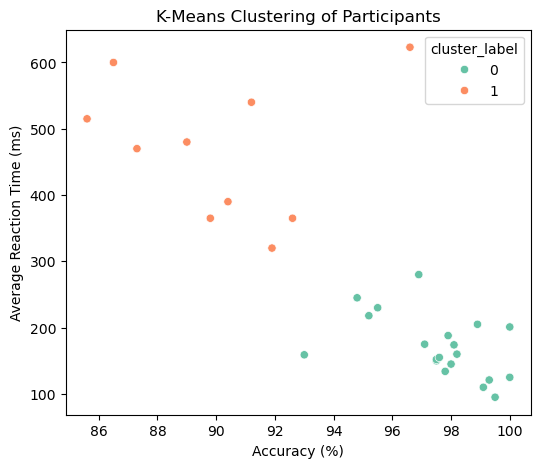

In [5]:
#Cluster visualisation
plt.figure(figsize=(6,5))

sns.scatterplot(data=data, x='accuracy', y='avg_reac_time', hue='cluster_label', palette='Set2')

plt.title('K-Means Clustering of Participants')
plt.xlabel('Accuracy (%)')
plt.ylabel('Average Reaction Time (ms)')

plt.savefig('data_visualisation.png')
plt.show()

In [6]:
#train test split
X= data[['accuracy', 'avg_reac_time']]
y= data['cluster_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

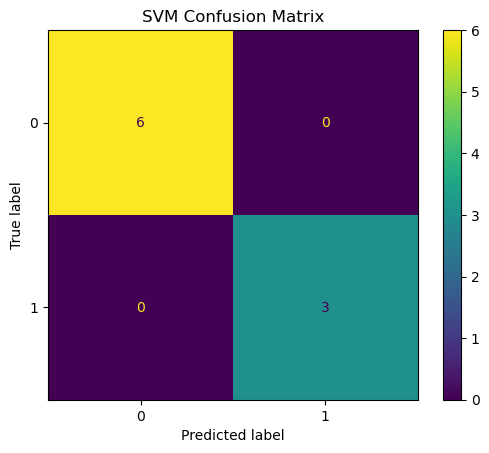

In [7]:
#SVM model with rbf kernel
svm = SVC()
svm.fit(X_train, y_train)

y_p_svm = svm.predict(X_test)

#confusion matrix
cm_svm = confusion_matrix(y_test, y_p_svm)
ConfusionMatrixDisplay(cm_svm).plot()

plt.title('SVM Confusion Matrix')
plt.savefig('svm_confusion_matrix.png')
plt.show()

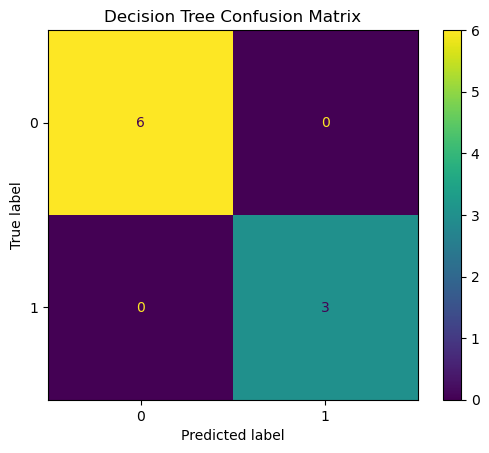

In [8]:
#Decision Tree
dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_p_dt = dt.predict(X_test)

#confusion matrix
cm_dt = confusion_matrix(y_test, y_p_dt)
ConfusionMatrixDisplay(cm_dt).plot()

plt.title('Decision Tree Confusion Matrix')
plt.savefig('dt_confusion_matrix.png')
plt.show()

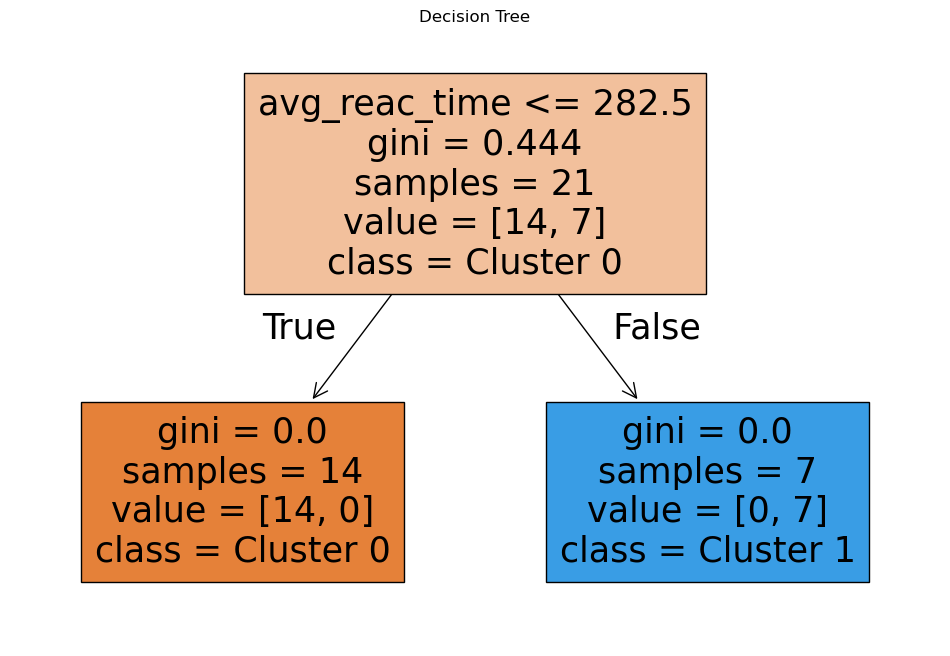

In [9]:
#Decision Tree visualisation
plt.figure(figsize=(12,8))

plot_tree(dt, filled=True, feature_names=['accuracy', 'avg_reac_time'], class_names=['Cluster 0', 'Cluster 1'])

plt.title('Decision Tree')
plt.savefig('dt_visualization.png')